<a href="https://colab.research.google.com/github/qhowery/COS324_PA0/blob/main/COS324_P0A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COS 324 Programming Assignment 0: Getting started in python and data visualization

_Princeton University Computer Science_

Welcome! Let's get up and running by loading a dataset, calculating a few stats, and doing some plotting.


## Assignment Instructions
<!---
# TODO: change deadline date
* **Due: September 15th, 12:30 PM Eastern Time.**
-->



Programming assignments will be written in Python. 


* **We strongly suggest that you use Google Colab, which has many libraries pre-installed for you, and *will only be supporting Google Colab in office hours*.** We will not be able to help you with issues/instructions regarding local Python environments. 
* The instructions for the assignments will provide some guidance on finding useful functions for completing the assignment, but **it will be up to you to search for the exact documentation for specific functions**. Learning to search for helpful information is an important skill for programming.
* **We expect your code to be readable and interpretable**, with meaningful variable names and comments that help us understand your code. Please refer to [PEP 8](https://www.python.org/dev/peps/pep-0008/) for guidance.
* Work is to be uploaded via Gradescope **(submit both the .ipynb file as well as a pdf of it)**. For help with submitting a pdf version, see this [document](https://docs.google.com/document/d/1PGBqzpqrkzcnLSUnJaEsp6eV1vZHC_5ig1O2bRtofOA/edit?usp=share_link). You can submit as often as you need, but only the last submission is graded, and submissions made after the deadline may incur a late penalty depending on your remaining free late hours.
* **Consulting TAs (grad or ugrad) and other students from this course is allowed**. Please refer to our collaboration policy for guidance on what is acceptable though, as well as the caution about plagiarism and the need to cite all sources you used. Clearly note whom you consulted with for each problem separately at the beginning of this notebook.
* **You may not use unauthorized packages or libraries.** If you use code from outside sources or past/other academic work, it must be targeted toward a single and minute purpose (e.g. one or two lines of code for changing the scale of plot axes) and not make up a significant portion of your submission. If you are copying a block of code, you are likely in violation of this rule.


## Python Help
For more help with using Python, please refer to the pre-work for Precept 1.

In [2]:
# Import
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import sklearn # not used in this assignment
import torch # not used in this assignment

**If you are completing this assignment locally (i.e. not using Google Colab), please run the following cell to ensure that your packages meet the minimum version requirement.** If not, please upgrade them using `pip` or `conda`. 

If you are using Google Colab, the packages should already meet the minimum version requirement.

In [3]:
# Version check
min_version_prefix = {
  matplotlib: "3.2.0",
  np: "1.18.0",
  sklearn: "0.22.0",
  torch: "1.6.0",
}

for pkg, ver in min_version_prefix.items():
  print(f"Found {pkg.__name__} version: {pkg.__version__}")
  print(f"The minimum requirement is {ver}\n")
        

Found matplotlib version: 3.2.2
The minimum requirement is 3.2.0

Found numpy version: 1.21.6
The minimum requirement is 1.18.0

Found sklearn version: 1.0.2
The minimum requirement is 0.22.0

Found torch version: 1.13.1+cu116
The minimum requirement is 1.6.0



## Working with datasets

First, let's get our data. This following command will clone a Github repository containing the necessary files to complete this assignment.


In [4]:
! git clone https://github.com/princeton-cos324/pa0.git

Cloning into 'pa0'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 8.06 KiB | 8.06 MiB/s, done.


On the sidebar, click on the icon of a folder to see the "Files" tab. You should see a new folder called `pa0`. Inside the folder, you should see the files `x.txt` and `y.txt`.

`x.txt` and `y.txt` contain the (x, y) coordinates of 1000 data points. To be clear, the nth value in `x.txt` and the nth value in `y.txt` constitute the nth data point's (x, y) coordinate, respectively.

* **Load the datasets using `numpy`** --  look for a function designed to load data from .txt files. Make sure the filepath is correct.
* **Print the mean and covariance of the x and y coordinates** (i.e., you output 1 number for each of the means, and a 2x2 array of numbers for the covariance matrix). 

In [5]:
# YOUR CODE GOES HERE
x = np.loadtxt("pa0/x.txt")
y = np.loadtxt("pa0/y.txt")
print("Mean of x: ", np.mean(x))
print("Mean of y: ", np.mean(y))
print(np.cov(x, y))

Mean of x:  0.45238109
Mean of y:  -0.03573894999999993
[[ 3.59533016 -2.59777172]
 [-2.59777172  6.23159824]]


You have probably seen [histograms](https://en.wikipedia.org/wiki/Histogram) which give a visualization of the spread of the data values. 
* Using `plt`, plot histograms of the empirical distributions of x & y (separately, one each) using 25 bins. 
* Be sure to clearly label the axes! 

Text(0, 0.5, 'Number of Coordinates')

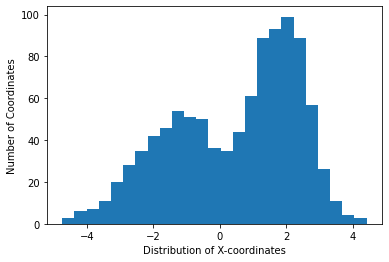

In [14]:
# YOUR CODE GOES HERE: PLOT HISTOGRAM FOR X
plt.hist(x, bins = 25)
plt.xlabel("Distribution of X-coordinates")
plt.ylabel("Number of Coordinates")


Text(0, 0.5, 'Number of Coordinates')

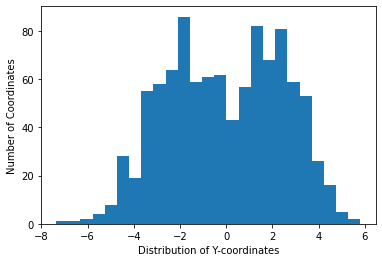

In [13]:
# YOUR CODE GOES HERE: PLOT HISTOGRAM FOR Y
plt.hist(y, bins = 25)
plt.xlabel("Distribution of Y-coordinates")
plt.ylabel("Number of Coordinates")

## 3-D visualization

You may have often seen 3-D plots of (x, y, z) values. `numpy` allows you to create these very easily, aided with nice shading to make them easier to visualize. It also gives ways to rotate the 3-D plot for better understanding. 

In this problem we give you the code to generate the (x, y, z) values by calling the function funky().

(Aside: The z values correspond to the difference of two Gaussian densities, but you don't need to understand that to do the homework.)

In [18]:
# HELPER CODE: DO NOT EDIT!
def funky(delta=0.01):
    delta = 0.01
    x = np.arange(-2.0, 2.5, delta)
    y = np.arange(-1.5, 2.5, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = Z1 - Z2
    return X, Y, Z

Call funky() to get (x,y,z) values of the function. Then, use `plt` to create a 3D plot of this function. For better visualization it is customary to use heatmap --cooler color for more negative values and warmer color for positive. Use `cm` (color map) for this. 

**Produce the 3D map with *two* different angles.** You can refer to [this tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) for step-by-step guidance.

Make sure:
* Axes are labeled
* `figsize` is (12,10)
* Good choice of colormap

For viewing the function from different angles you can use:
```
    ax.view_init(elev=your_elevation, azim=your_azymuth)
```
where ax is the handle returned by:
```
    ax = plt.figure( ... )
```

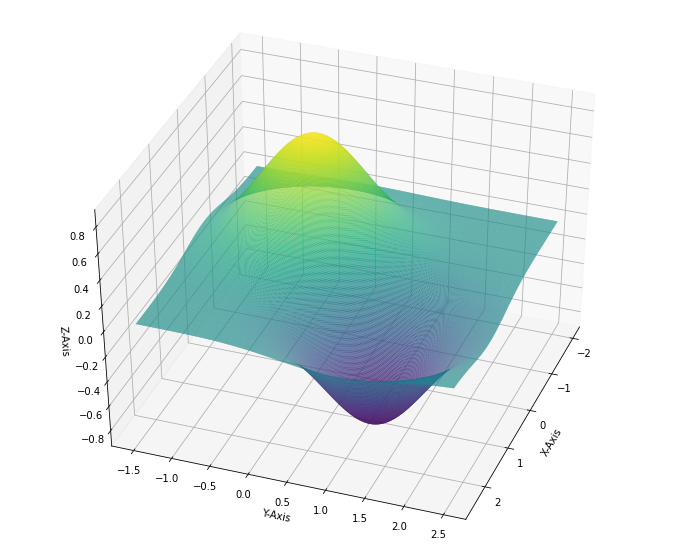

In [22]:
# YOUR CODE GOES HERE
fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection = "3d")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
ax.set_zlabel('Z-Axis')


X, Y, Z = funky()
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(40, 20)
